In [1]:
"""Data inspection."""

'Data inspection.'

In [137]:
import csv
import glob
import matplotlib
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import animation
import nibabel
import os
import sklearn
import shutil

import torch
import numpy as np
import pickle
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets

import importlib
import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import vis
importlib.reload(vis)

CRYO_DIR = '/cryo/'
TRAIN_VAL_DIR = os.path.join(CRYO_DIR, 'train_val_datasets')
OUTPUT = '/scratch/users/nmiolane/output_cryo_sim'
DEVICE = 'cuda'

IMG_SHAPE = (128, 128)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_IMG_PATH = os.path.join(TRAIN_VAL_DIR, 'cryo_sim_%s.npy' % SHAPE_STR)
TRAIN_LABELS_PATH = os.path.join(TRAIN_VAL_DIR, 'cryo_sim_labels_%s.csv' % SHAPE_STR)

Loading /cryo/train_val_datasets/cryo_sim_128x128.npy
Dataset shape: (2544, 1, 128, 128)


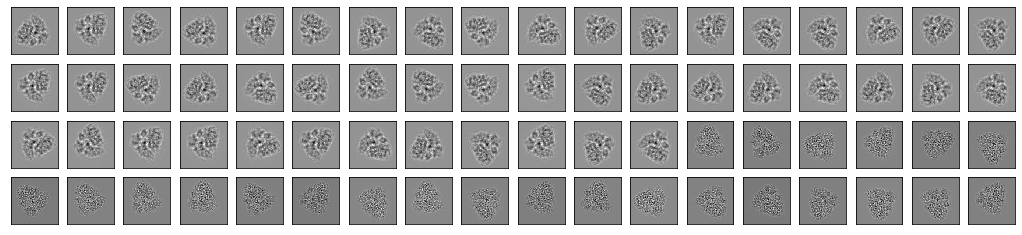

In [21]:
vis.show_data(TRAIN_IMG_PATH)

### Inspect training

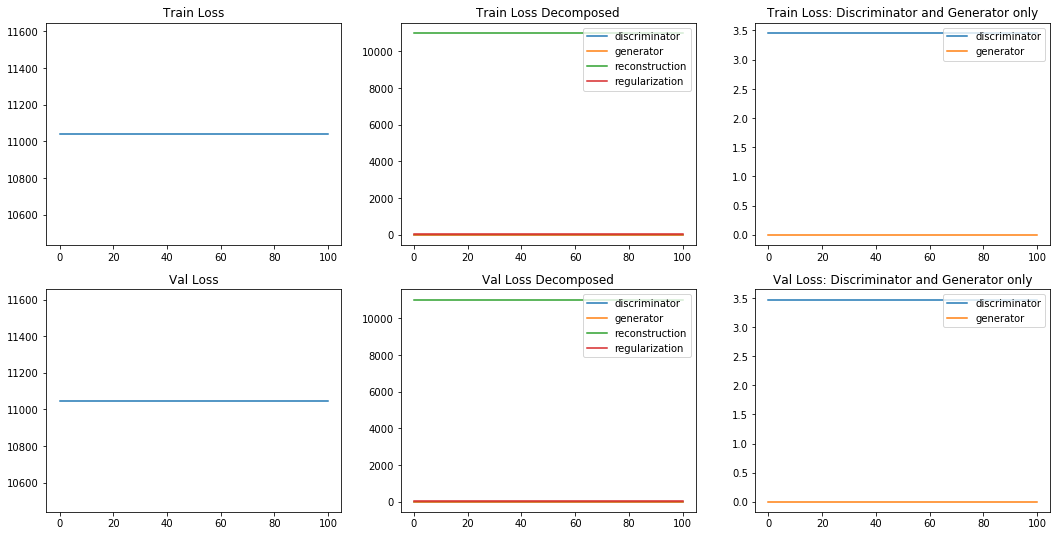

In [119]:
epoch_id = 100
vis.plot_losses(OUTPUT, epoch_id=epoch_id)

# Inspect the latent space

Last checkpoint:  /scratch/users/nmiolane/output_cryo_sim/training/models/epoch_110_encoder_train_loss_11039.0002_val_loss_11043.6528.pth


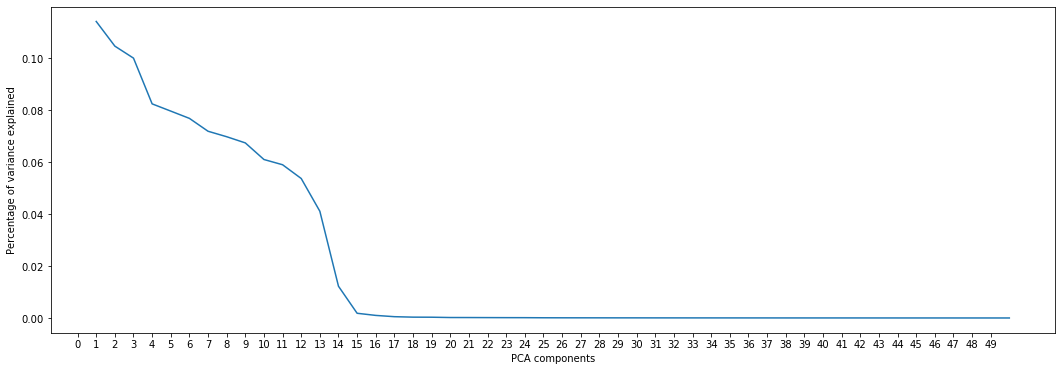

In [150]:
N_PCA_COMPONENTS = 50

dataset = np.load(TRAIN_IMG_PATH)
mus = analyze.latent_projection(OUTPUT, dataset)

pca, projected_mus = analyze.pca_projection(mus, N_PCA_COMPONENTS)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
plot = ax.plot(np.arange(1, N_PCA_COMPONENTS+1), pca.explained_variance_ratio_)
xlabel = ax.set_xlabel('PCA components')
ylabel = ax.set_ylabel('Percentage of variance explained')
ticks = ax.set_xticks(np.arange(0, 50, step=1))

In [153]:
def get_cryo(img_path, labels_path, n_pc=2):
    focuses = []

    with open(labels_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            focuses.append(float(row[0]))
        
    test_dataset = np.load(img_path)

    # Note: the test dataset needs to be unshuffled here
    mus = analyze.latent_projection(OUTPUT, test_dataset)
    _, projected_mus = analyze.pca_projection(mus, n_pc)

    return projected_mus, focuses

In [151]:
FOCUS_MAX = 3.
start = 0.5
by = 0.5
num = int((FOCUS_MAX - start) / by + 1)
colormap = cm.get_cmap('viridis')
COLORS = colormap(np.linspace(start=0, stop=1, num=num))

def plot_cryo(ax, img_path, labels_path, n_pc=2):
    projected_mus, focuses = get_cryo(img_path, labels_path, n_pc=n_pc)

    for mu, focus in zip(projected_mus, focuses):
        color_id = int(2 * focus) - 1
        if n_pc == 2:
            im = ax.scatter(mu[0], mu[1], c=np.array([COLORS[color_id]]), s=4)
        else:
            im = ax.scatter(mu[0], mu[1], mu[2], c=np.array([COLORS[color_id]]))
    return im, ax

# 2D

Last checkpoint:  /scratch/users/nmiolane/output_cryo_sim/training/models/epoch_110_encoder_train_loss_11039.0002_val_loss_11043.6528.pth


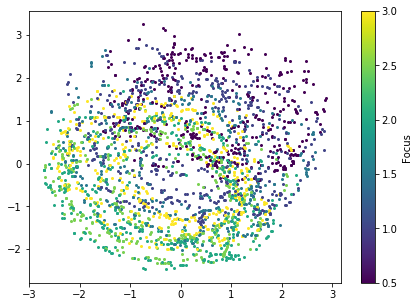

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

im, ax = plot_cryo(ax, TRAIN_IMG_PATH, TRAIN_LABELS_PATH)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

# 3D

Last checkpoint:  /scratch/users/nmiolane/output_cryo_sim/training/models/epoch_110_encoder_train_loss_11039.0002_val_loss_11043.6528.pth


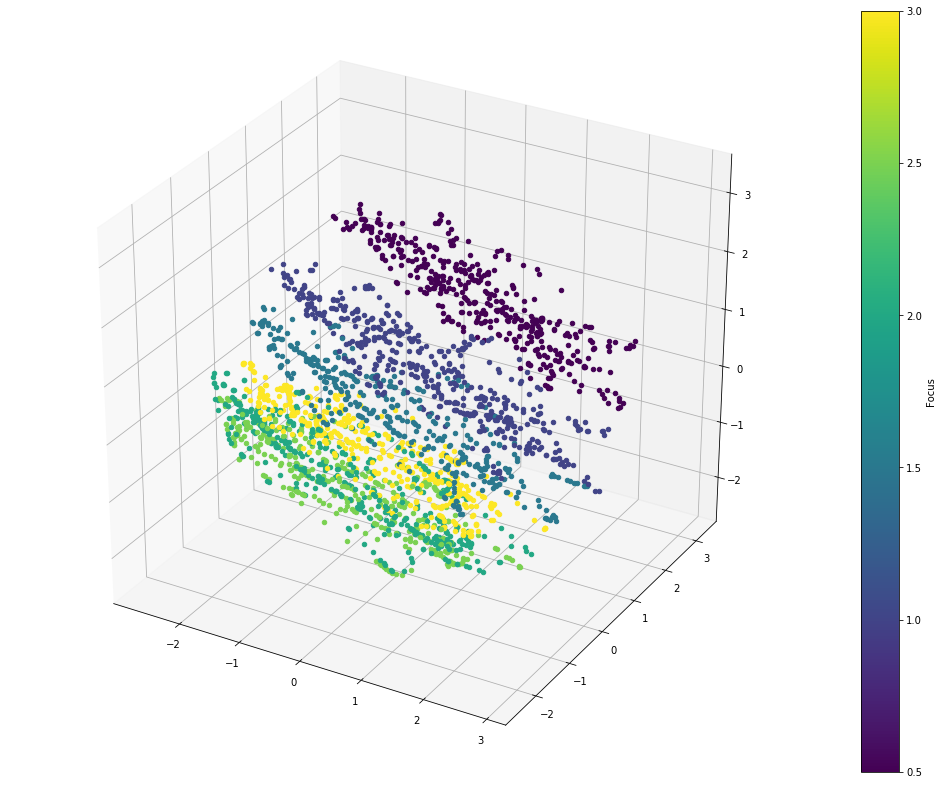

In [157]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

im, ax = plot_cryo(ax, TRAIN_IMG_PATH, TRAIN_LABELS_PATH, n_pc=3)
cb = fig.colorbar(im, ax=ax)
focus = cb.set_label('Focus')
yticklabels = cb.ax.set_yticklabels(np.arange(start=0.5, stop=3.5, step=0.5))

### Interactive exploration of PCA in each cluster

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


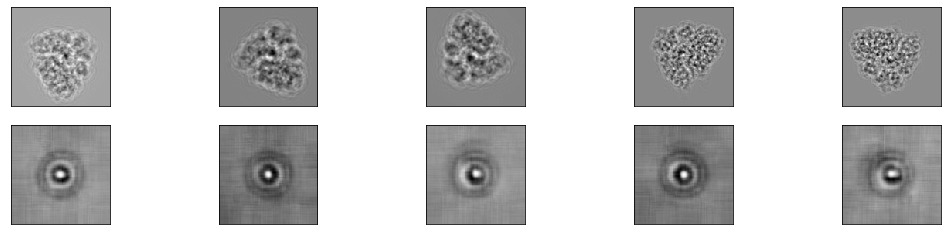

In [120]:
epoch_id = 1
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


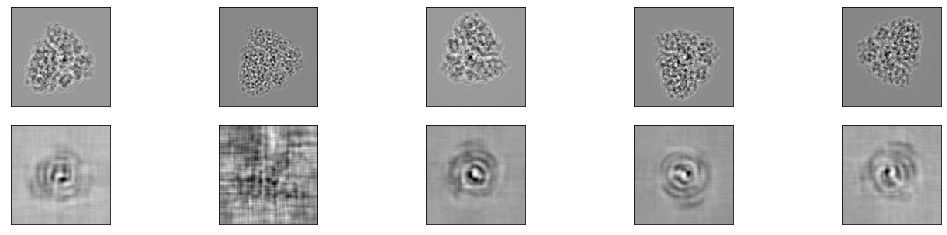

In [122]:
epoch_id = 5
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


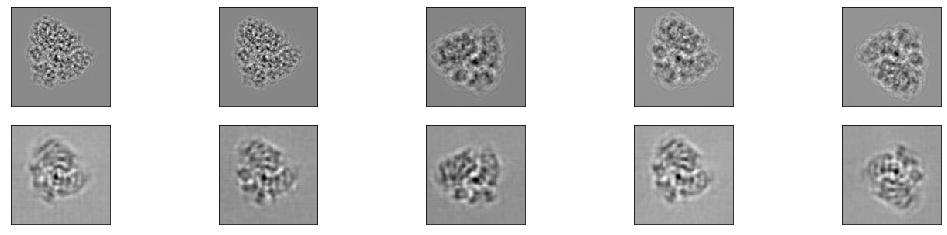

In [123]:
epoch_id = 10
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


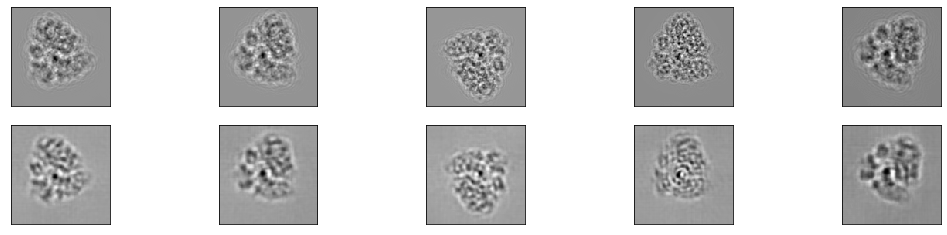

In [124]:
epoch_id = 15
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


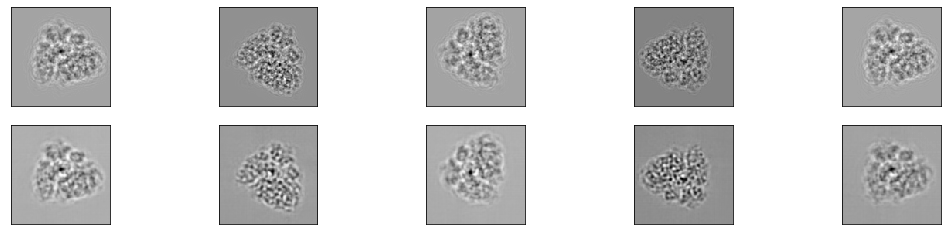

In [125]:
epoch_id = 50
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')

Shape of img data:
(5, 1, 128, 128)
Shape of recon:
(5, 1, 128, 128)


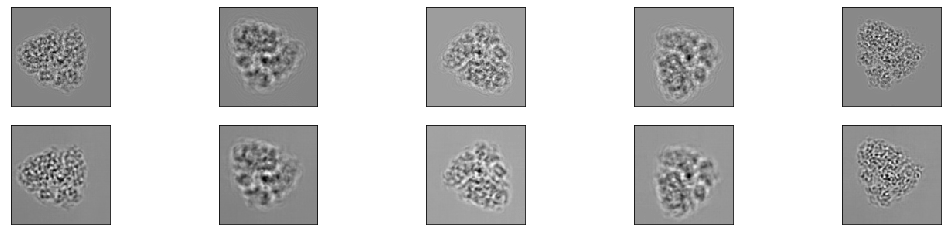

In [159]:
epoch_id = 110
vis.plot_img_and_recon(OUTPUT, epoch_id=epoch_id, cmap='gray')